Sampling Rate for song 1: 22050 Hz
Sampling Rate for song 2: 22050 Hz
Spectral Features for song 1:
[[-301.8141    -108.26323    -24.847313  ...   10.032198   -58.129387
  -288.55017  ]
 [  90.19246     65.3116      67.60902   ...  102.56265    103.0841
   102.04856  ]
 [  22.495483    46.6995      43.22116   ...    7.8443217    8.866998
    15.395264 ]
 ...
 [ -12.6153145   -6.382079     4.921315  ...    3.405204     3.0490515
     2.3726854]
 [   4.8509026   11.923296     3.4373868 ...    4.417289     6.083779
     2.3591516]
 [   6.6843767    4.499497    -5.2016582 ...   11.8241205   14.132692
    16.409622 ]]
Spectral Features for song 2:
[[-490.9769    -490.9769    -310.7743    ...   18.328403   -55.980656
  -259.5201   ]
 [   0.           0.          97.54848   ...   71.51373     71.83714
    61.088448 ]
 [   0.           0.         -16.029184  ...  -34.625076   -34.544285
   -33.288177 ]
 ...
 [   0.           0.          -4.122451  ...  -16.369015   -22.262472
   -20.839527 ]
 

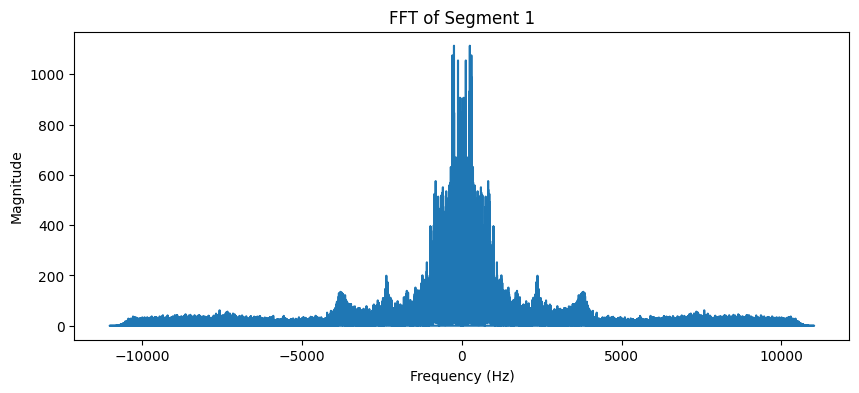

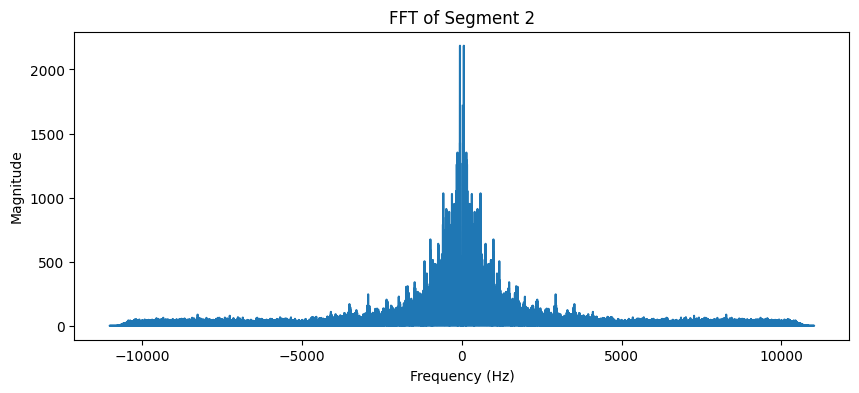

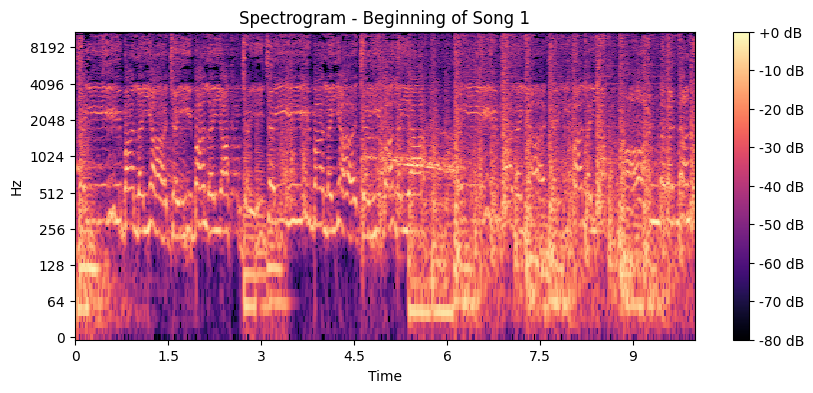

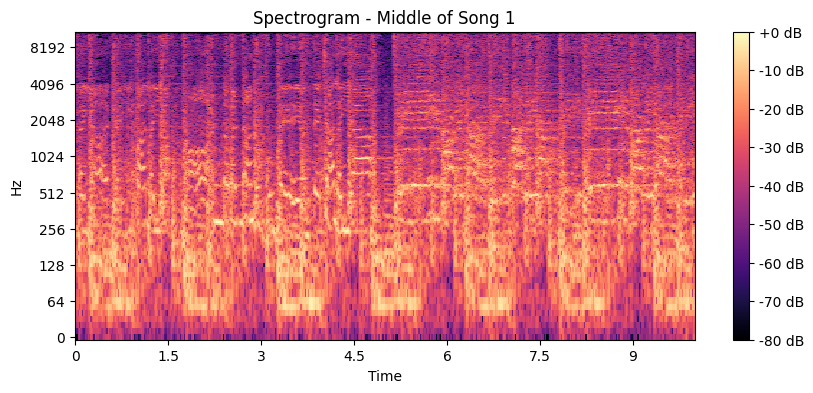

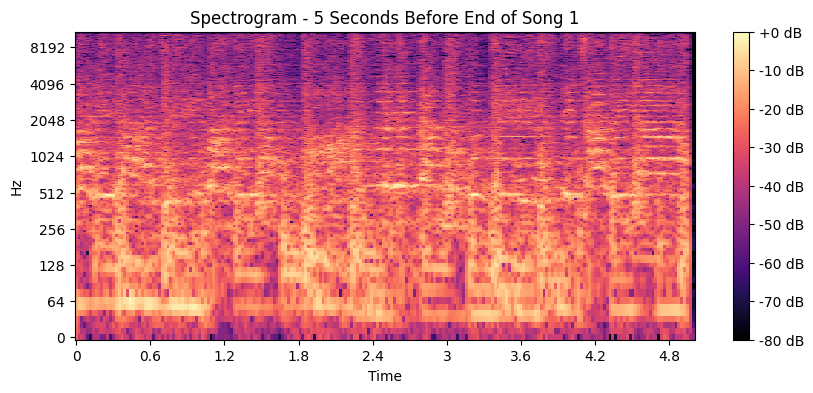

In [1]:
#part A- Audio Processing

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Replace 'song1.mp3', 'song2.mp3', etc. with your audio file paths

audio_file1 = 'Jai Balayya Jai Balayya - Jai Balayya ! Telugu.mp3'
audio_file2 = 'Master - Songs.mp3'

# Load the audio files

y1, sr1 = librosa.load(audio_file1)
y2, sr2 = librosa.load(audio_file2)

# Display the sampling rate

print(f"Sampling Rate for song 1: {sr1} Hz")
print(f"Sampling Rate for song 2: {sr2} Hz")

# Extract and display 5-7 spectral features

spectral_features1 = librosa.feature.mfcc(y=y1, sr=sr1)
spectral_features2 = librosa.feature.mfcc(y=y2, sr=sr2)

# Display the first 5-7 spectral features

print(f"Spectral Features for song 1:\n{spectral_features1[:7]}")
print(f"Spectral Features for song 2:\n{spectral_features2[:7]}")

# Extract and display 2 rhythm features

tempo1, _ = librosa.beat.beat_track(y=y1, sr=sr1)
tempo2, _ = librosa.beat.beat_track(y=y2, sr=sr2)

# Display the rhythm features

print(f"Tempo for song 1: {tempo1} BPM")
print(f"Tempo for song 2: {tempo2} BPM")

# Define a function to plot the FFT of a segment

def plot_fft(segment, sr, title):
    plt.figure(figsize=(10, 4))
    fft = np.fft.fft(segment)
    magnitude = np.abs(fft)
    frequency = np.fft.fftfreq(len(segment), 1 / sr)
    plt.plot(frequency, magnitude)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title(title)
    plt.show()

# Define the segments for analysis (replace with appropriate start times)

segment1_start = 0
segment2_start = sr1 * 10  # 10 seconds into the audio

# Plot FFT for the segments

plot_fft(y1[segment1_start:segment1_start + sr1 * 10], sr1, "FFT of Segment 1")
plot_fft(y1[segment2_start:segment2_start + sr1 * 10], sr1, "FFT of Segment 2")

# Define a function to plot a spectrogram

def plot_spectrogram(y, sr, title):
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

# Plot spectrograms for different parts of the audio files

plot_spectrogram(y1[:sr1 * 10], sr1, "Spectrogram - Beginning of Song 1")
plot_spectrogram(y1[len(y1) // 2 - sr1 * 5:len(y1) // 2 + sr1 * 5], sr1, "Spectrogram - Middle of Song 1")
plot_spectrogram(y1[-sr1 * 5:], sr1, "Spectrogram - 5 Seconds Before End of Song 1")

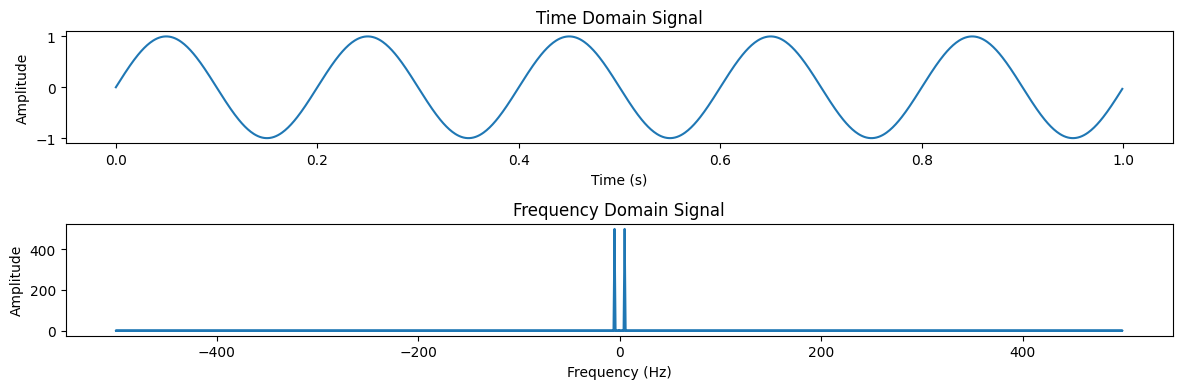

In [2]:

import numpy as np
import matplotlib.pyplot as plt

# Create a time-domain signal (example sine wave)

sample_rate = 1000  # Hz
duration = 1  # seconds
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
frequency = 5  # Hz
signal = np.sin(2 * np.pi * frequency * t)

# Perform FFT to convert to the frequency domain

fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(fft_result), 1/sample_rate)

# Plot the time-domain signal

plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Time Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the frequency-domain signal

plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result))
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()